In [40]:
import numpy as np
import pandas as pd
import scipy

import os

import neurokit2 as nk
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = [15, 6]

In [10]:
A_quality_EDA_files = ['A/' + f for f in os.listdir('A')]
B_quality_EDA_files = ['B/' + f for f in os.listdir('B')]
C_quality_EDA_files = ['C/' + f for f in os.listdir('C')]
F_quality_EDA_files = ['F/' + f for f in os.listdir('F')]

sample_rate = 51.2
eda_col = 'GSR_Skin_Conductance_CAL'

In [13]:
def load_eda_data(f):
    # Read datafile.
    data = pd.read_csv(f, header=1, sep="\t", low_memory=False)
    # Remove first col.
    data = data.drop(0, axis=0)
    # Convert To Float data (pandas pulls in as strings because of the label col removed above).
    for col in data.columns:
        data[f"{col}"] = data[f"{col}"].astype("float")
    # get EDA column name
    eda_col = [x for x in filter(lambda x: x.endswith('GSR_Skin_Conductance_CAL'), data.columns)][0]
    data = data.rename(columns={eda_col: 'GSR_Skin_Conductance_CAL'})
    return data

In [24]:
def is_data_missing(sig):
    # sig should be pandas Series object
    # - aka pass in column of dataframe
    length = len(sig)
    nulls = length - sum((sig.notnull()).astype(int))
    nans = length - sum((sig.notna()).astype(int))
    if nulls == 0 and nans == 0:
        return False
    else:
        return True

In [31]:
data = {
    'A': load_eda_data(A_quality_EDA_files[0]),
    'B': load_eda_data(B_quality_EDA_files[5]),
    'C': load_eda_data(C_quality_EDA_files[4])
}

In [34]:
#path = "../../../../Dropbox (Emotive Computing)/CPS2/Processed Output/Physio/Shimmer by Block with HR/"
#files = os.listdir(path)

for k in data.keys():
    if is_data_missing(data[k][eda_col]):
        print(f + ': missing data detected')

##### EDA Functions in neurokit2
 'eda',
 'eda_analyze',
 'eda_autocor',
 'eda_changepoints',
 'eda_clean',
 'eda_eventrelated',
 'eda_findpeaks',
 'eda_fixpeaks',
 'eda_intervalrelated',
 'eda_peaks',
 'eda_phasic',
 'eda_plot',
 'eda_process',
 'eda_simulate',
 'eda_sympathetic',

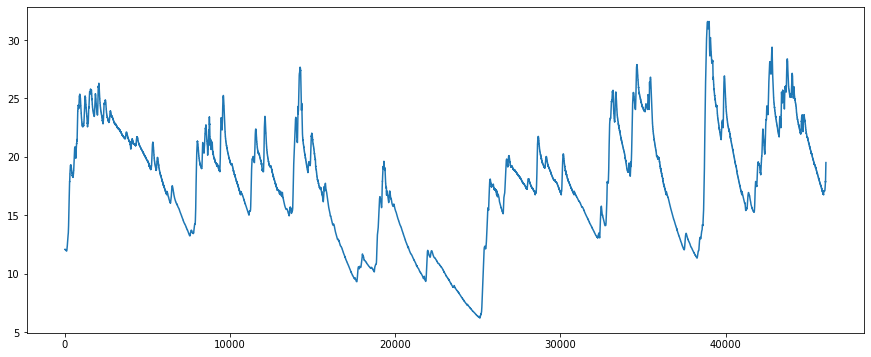

In [39]:
eda_signal = data['A'][eda_col]
plt.plot(eda_signal)

C:\Users\nickh\Anaconda3\envs\eda\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


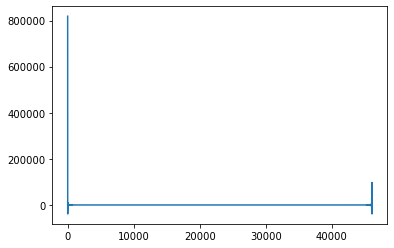

In [52]:
x = eda_signal.to_numpy()
plt.plot(scipy.fft.fft(x))

In [54]:
N = len(x)
T = 1/sample_rate
xf = scipy.fft.fftfreq(N, T)[:N//2]

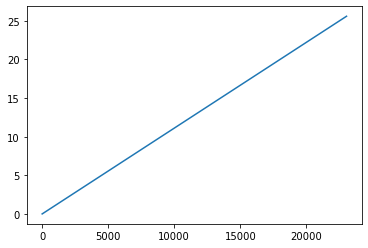

In [55]:
plt.plot(xf)

In [ ]:
#### 